<a href="https://colab.research.google.com/github/rim-nsr3/Brain-Tumor-Classification/blob/main/Brain_Tumor_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
! kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
100% 149M/149M [00:07<00:00, 21.1MB/s]
100% 149M/149M [00:07<00:00, 20.0MB/s]


In [6]:
def get_class_paths(path):
    classes = []
    class_paths = []

    # Iterate through directories in the training path
    for label in os.listdir(path):
        label_path = os.path.join(path, label)

        # Check if it's a directory
        if os.path.isdir(label_path):
            # Iterate through images in the label directory
            for image in os.listdir(label_path):
                image_path = os.path.join(label_path, image)

                # Add class and path to respective lists
                classes.append(label)
                class_paths.append(image_path)

    # Create a DataFrame with the collected data
    df = pd.DataFrame({
        'Class Path': class_paths,
        'Class': classes
    })

    return df


In [7]:
tr_df = get_class_paths("/content/Training")

In [8]:
tr_df

,Class Path,Class
0,/content/Training/notumor/Tr-no_1016.jpg,notumor
1,/content/Training/notumor/Tr-no_0453.jpg,notumor
2,/content/Training/notumor/Tr-no_0369.jpg,notumor
3,/content/Training/notumor/Tr-no_0089.jpg,notumor
4,/content/Training/notumor/Tr-no_0614.jpg,notumor
...,...,...
5707,/content/Training/meningioma/Tr-me_0943.jpg,meningioma
5708,/content/Training/meningioma/Tr-me_1114.jpg,meningioma
5709,/content/Training/meningioma/Tr-me_0503.jpg,meningioma
5710,/content/Training/meningioma/Tr-me_0946.jpg,meningioma


In [9]:
ts_df = get_class_paths("/content/Testing")

In [10]:
ts_df

,Class Path,Class
0,/content/Testing/notumor/Te-no_0051.jpg,notumor
1,/content/Testing/notumor/Te-no_0223.jpg,notumor
2,/content/Testing/notumor/Te-no_0310.jpg,notumor
3,/content/Testing/notumor/Te-no_0276.jpg,notumor
4,/content/Testing/notumor/Te-no_0298.jpg,notumor
...,...,...
1306,/content/Testing/meningioma/Te-me_0255.jpg,meningioma
1307,/content/Testing/meningioma/Te-me_0279.jpg,meningioma
1308,/content/Testing/meningioma/Te-me_0115.jpg,meningioma
1309,/content/Testing/meningioma/Te-me_0037.jpg,meningioma


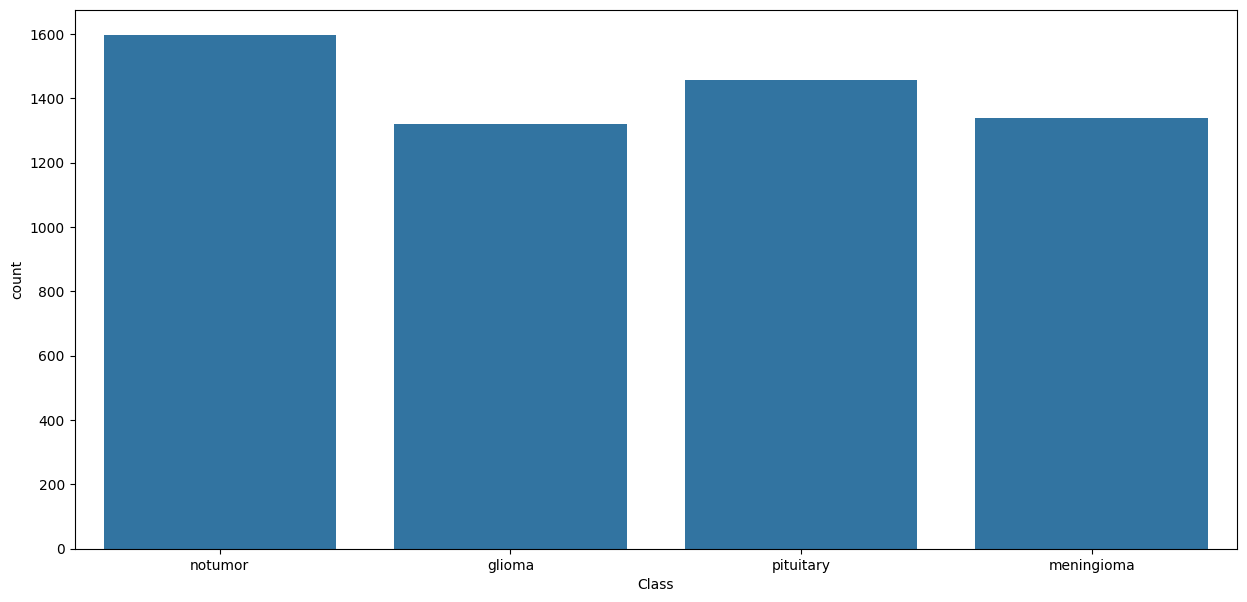

In [11]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=tr_df, x=tr_df['Class'])

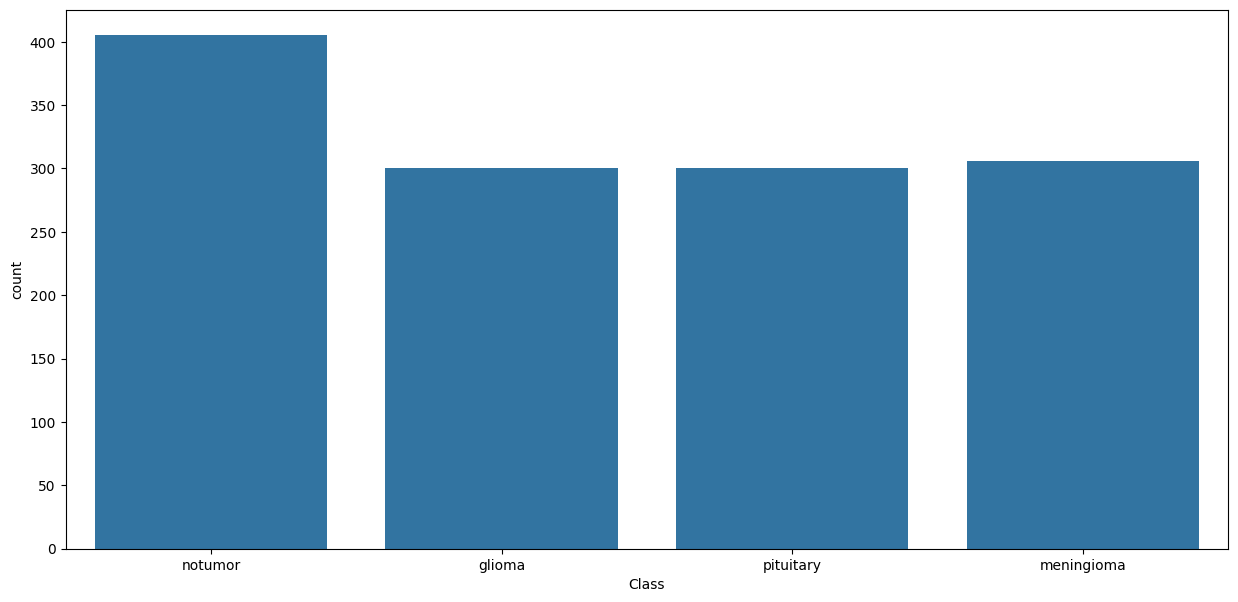

In [12]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=ts_df, x=ts_df['Class'])

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
valid_df, ts_df = train_test_split(ts_df, train_size=0.5, stratify=ts_df['Class'])

In [15]:
valid_df

,Class Path,Class
738,/content/Testing/pituitary/Te-pi_0161.jpg,pituitary
456,/content/Testing/glioma/Te-gl_0291.jpg,glioma
650,/content/Testing/glioma/Te-gl_0221.jpg,glioma
437,/content/Testing/glioma/Te-gl_0220.jpg,glioma
532,/content/Testing/glioma/Te-gl_0192.jpg,glioma
...,...,...
945,/content/Testing/pituitary/Te-pi_0041.jpg,pituitary
680,/content/Testing/glioma/Te-gl_0201.jpg,glioma
670,/content/Testing/glioma/Te-gl_0254.jpg,glioma
321,/content/Testing/notumor/Te-noTr_0000.jpg,notumor


In [16]:
ts_df

,Class Path,Class
843,/content/Testing/pituitary/Te-pi_0274.jpg,pituitary
423,/content/Testing/glioma/Te-gl_0230.jpg,glioma
1230,/content/Testing/meningioma/Te-me_0299.jpg,meningioma
1089,/content/Testing/meningioma/Te-me_0013.jpg,meningioma
873,/content/Testing/pituitary/Te-pi_0037.jpg,pituitary
...,...,...
1120,/content/Testing/meningioma/Te-me_0146.jpg,meningioma
1080,/content/Testing/meningioma/Te-me_0056.jpg,meningioma
640,/content/Testing/glioma/Te-gl_0212.jpg,glioma
290,/content/Testing/notumor/Te-no_0328.jpg,notumor


In [17]:
batch_size = 32

img_size = (299,299)

image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8,1.2))

ts_gen = ImageDataGenerator(rescale=1/255)



In [18]:
tr_gen = image_generator.flow_from_dataframe(
    tr_df,
    x_col='Class Path',
    y_col='Class',
    batch_size=batch_size,
    target_size=img_size
)
valid_gen = image_generator.flow_from_dataframe(
    valid_df,
    x_col='Class Path',
    y_col='Class',
    batch_size=batch_size,
    target_size=img_size
)
ts_gen = ts_gen.flow_from_dataframe(
    ts_df,
    x_col='Class Path',
    y_col='Class',
    batch_size=16,
    target_size=img_size, shuffle=False
)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


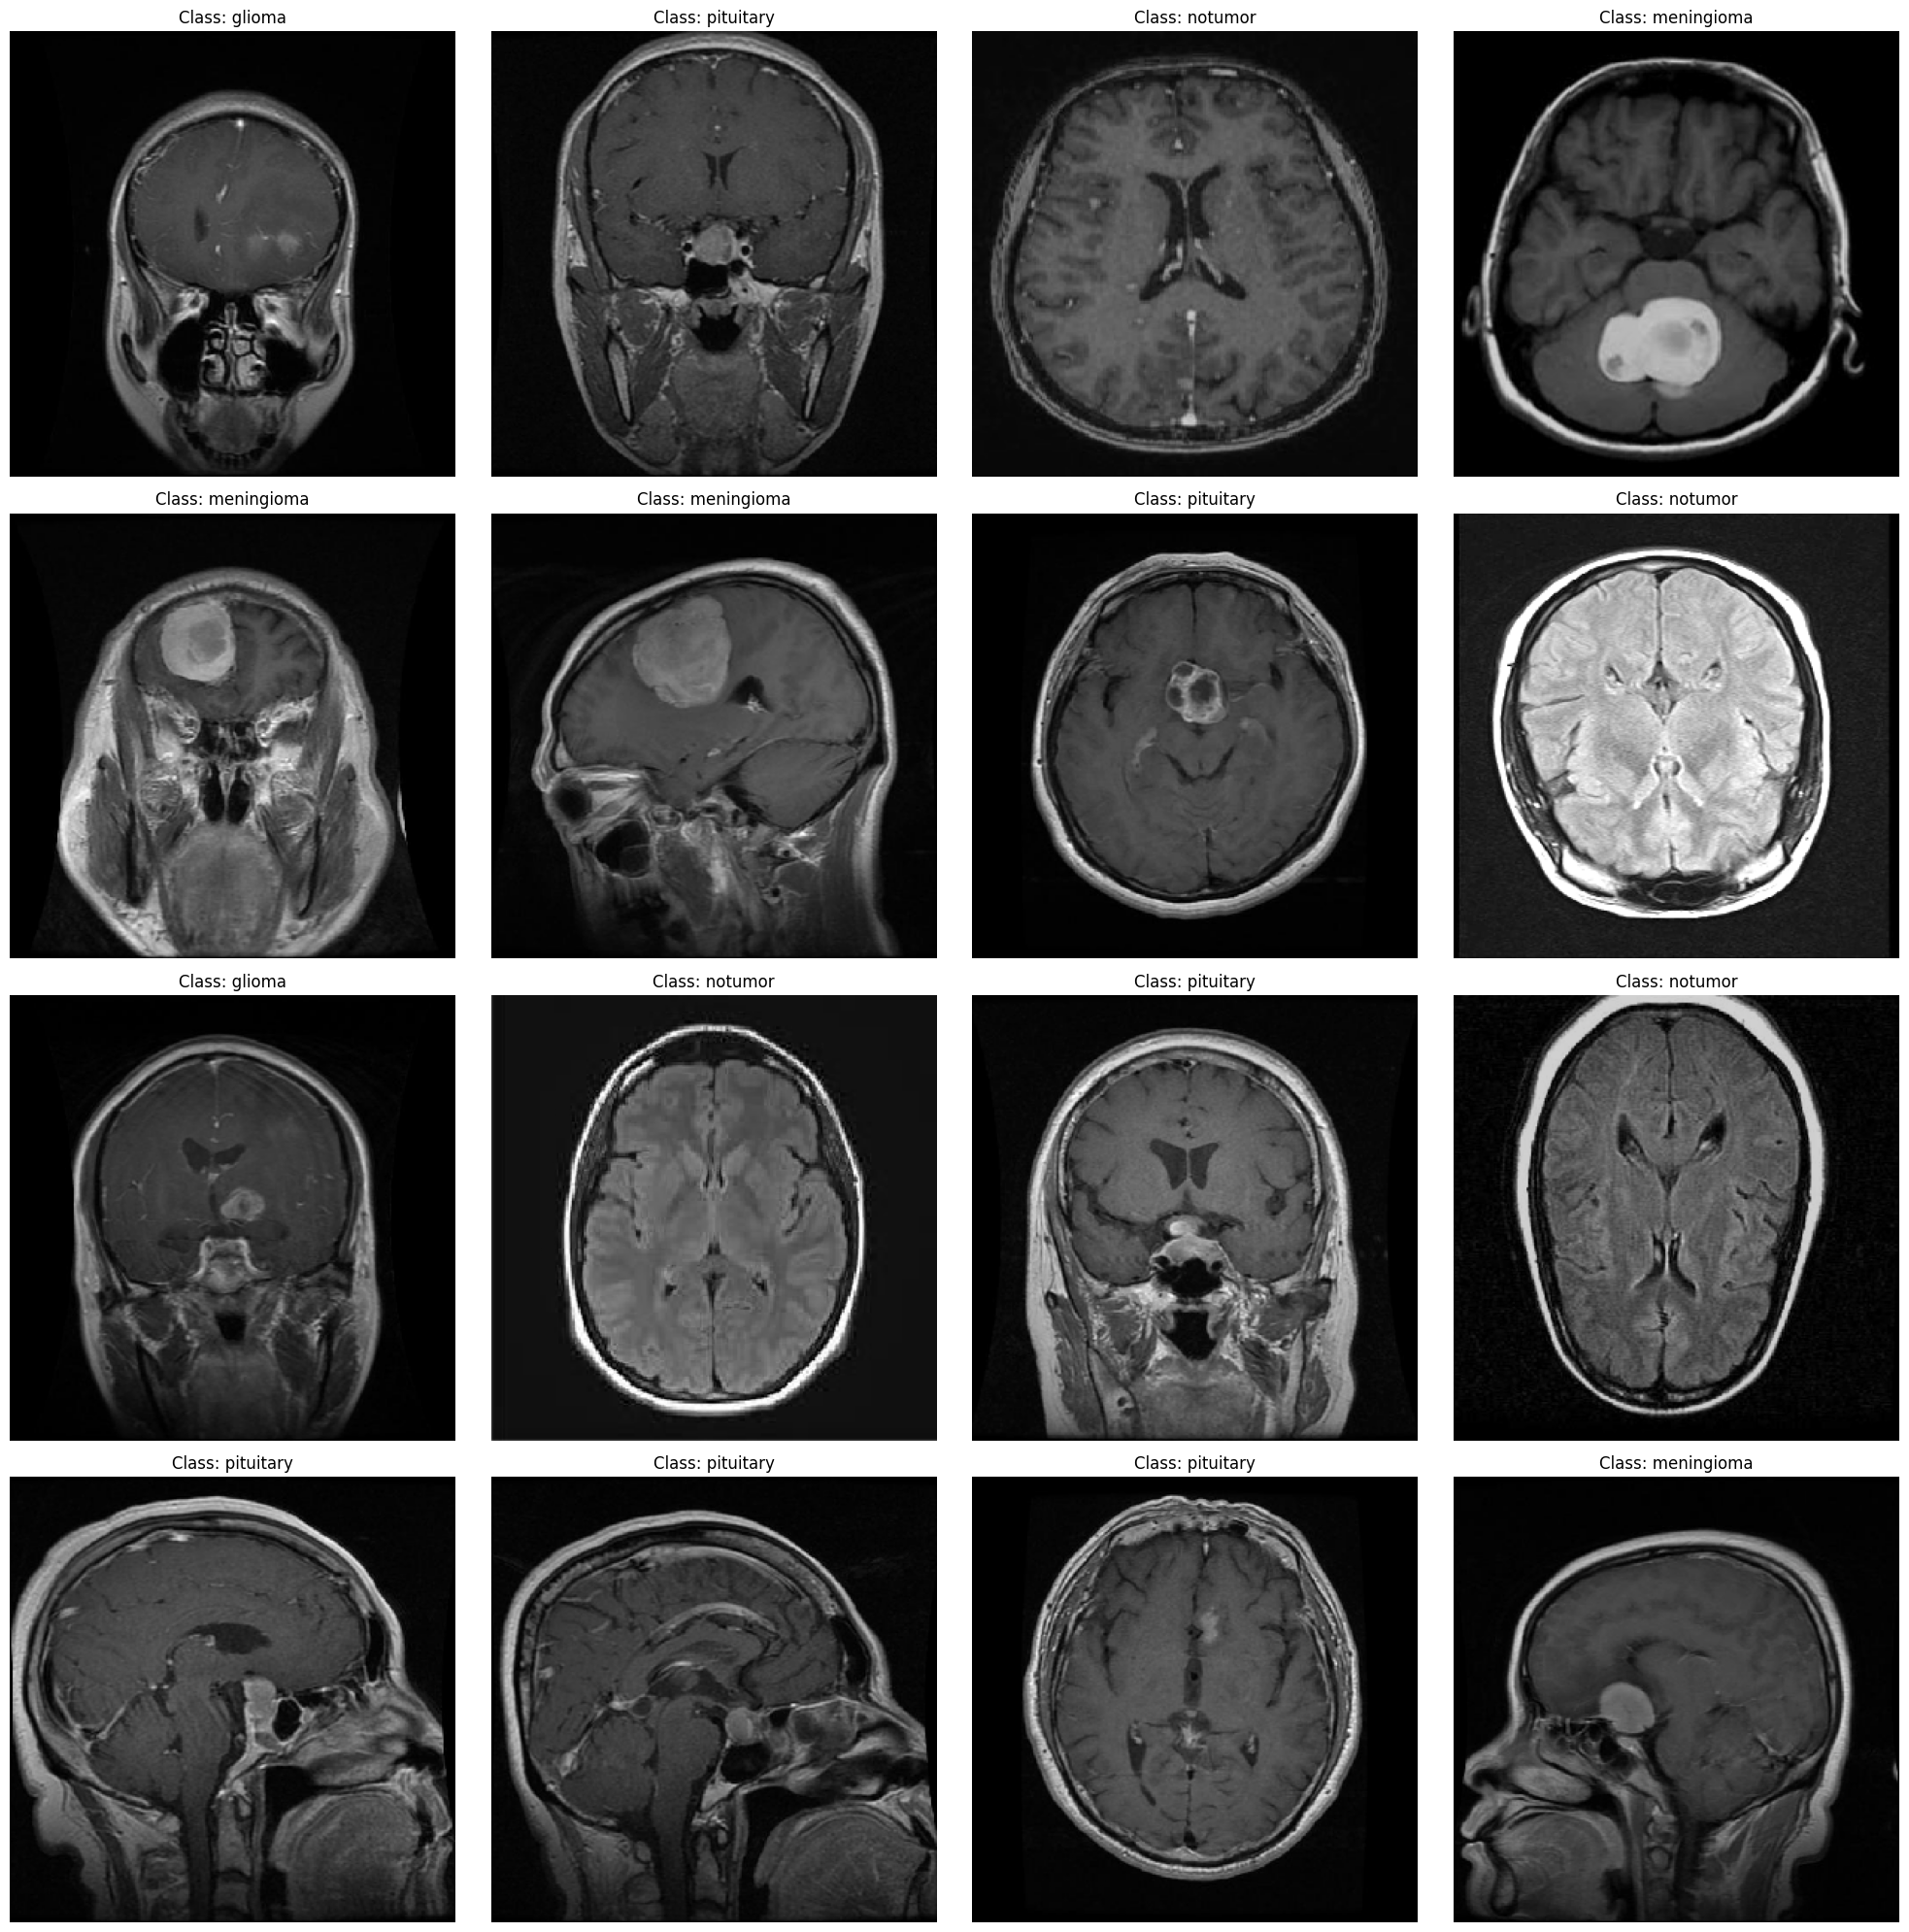

In [19]:
plt.figure(figsize=(20, 20))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    batch = next(tr_gen)
    image = batch[0][0]
    label = batch[1][0]
    plt.imshow(image)

    # Get the class index
    class_index = np.argmax(label)

    # Get the list of class names and class indices
    class_names = list(tr_gen.class_indices.keys())
    class_indices = list(tr_gen.class_indices.values())

    # Find the index of the class_index in the list of indices
    index_position = class_indices.index(class_index)

    # Get the class name using the index position
    class_name = class_names[index_position]

    plt.title(f"Class: {class_name}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [20]:
 img_shape = (299, 299, 3)
 base_model = tf.keras.applications.Xception(
    include_top=False,
    weights="imagenet",
    input_shape=img_shape,
    pooling="max"
)
model = Sequential([
    base_model,
    Flatten(),
    Dropout(rate=0.3),
    Dense(128, activation='relu'),
    Dropout(rate=0.25),
    Dense(4, activation='softmax')
])


83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [21]:
model.compile(
    Adamax(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy', Precision(), Recall()]
)


In [22]:
hist = model.fit(tr_gen, epochs=5, validation_data=valid_gen)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 274s 1s/step - accuracy: 0.7924 - loss: 0.5999 - precision: 0.8557 - recall: 0.7044 - val_accuracy: 0.9282 - val_loss: 0.2071 - val_precision: 0.9282 - val_recall: 0.9282
Epoch 2/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 157s 827ms/step - accuracy: 0.9801 - loss: 0.0675 - precision: 0.9808 - recall: 0.9776 - val_accuracy: 0.9359 - val_loss: 0.2010 - val_precision: 0.9441 - val_recall: 0.9282
Epoch 3/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 152s 842ms/step - accuracy: 0.9903 - loss: 0.0281 - precision: 0.9903 - recall: 0.9900 - val_accuracy: 0.9740 - val_loss: 0.0988 - val_precision: 0.9755 - val_recall: 0.9710
Epoch 4/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 151s 838ms/step - accuracy: 0.9967 - loss: 0.0123 - precision: 0.9967 - recall: 0.9966 - val_accuracy: 0.9802 - val_loss: 0.0933 - val_precision: 0.9802 - val_recall: 0.9802
Epoch 5/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 201s 834ms/step - accuracy: 0.9937 - loss: 0.0181 - precision: 0.9940 - recall: 0.9937 - val_accuracy: 0.9878 - val_loss: 

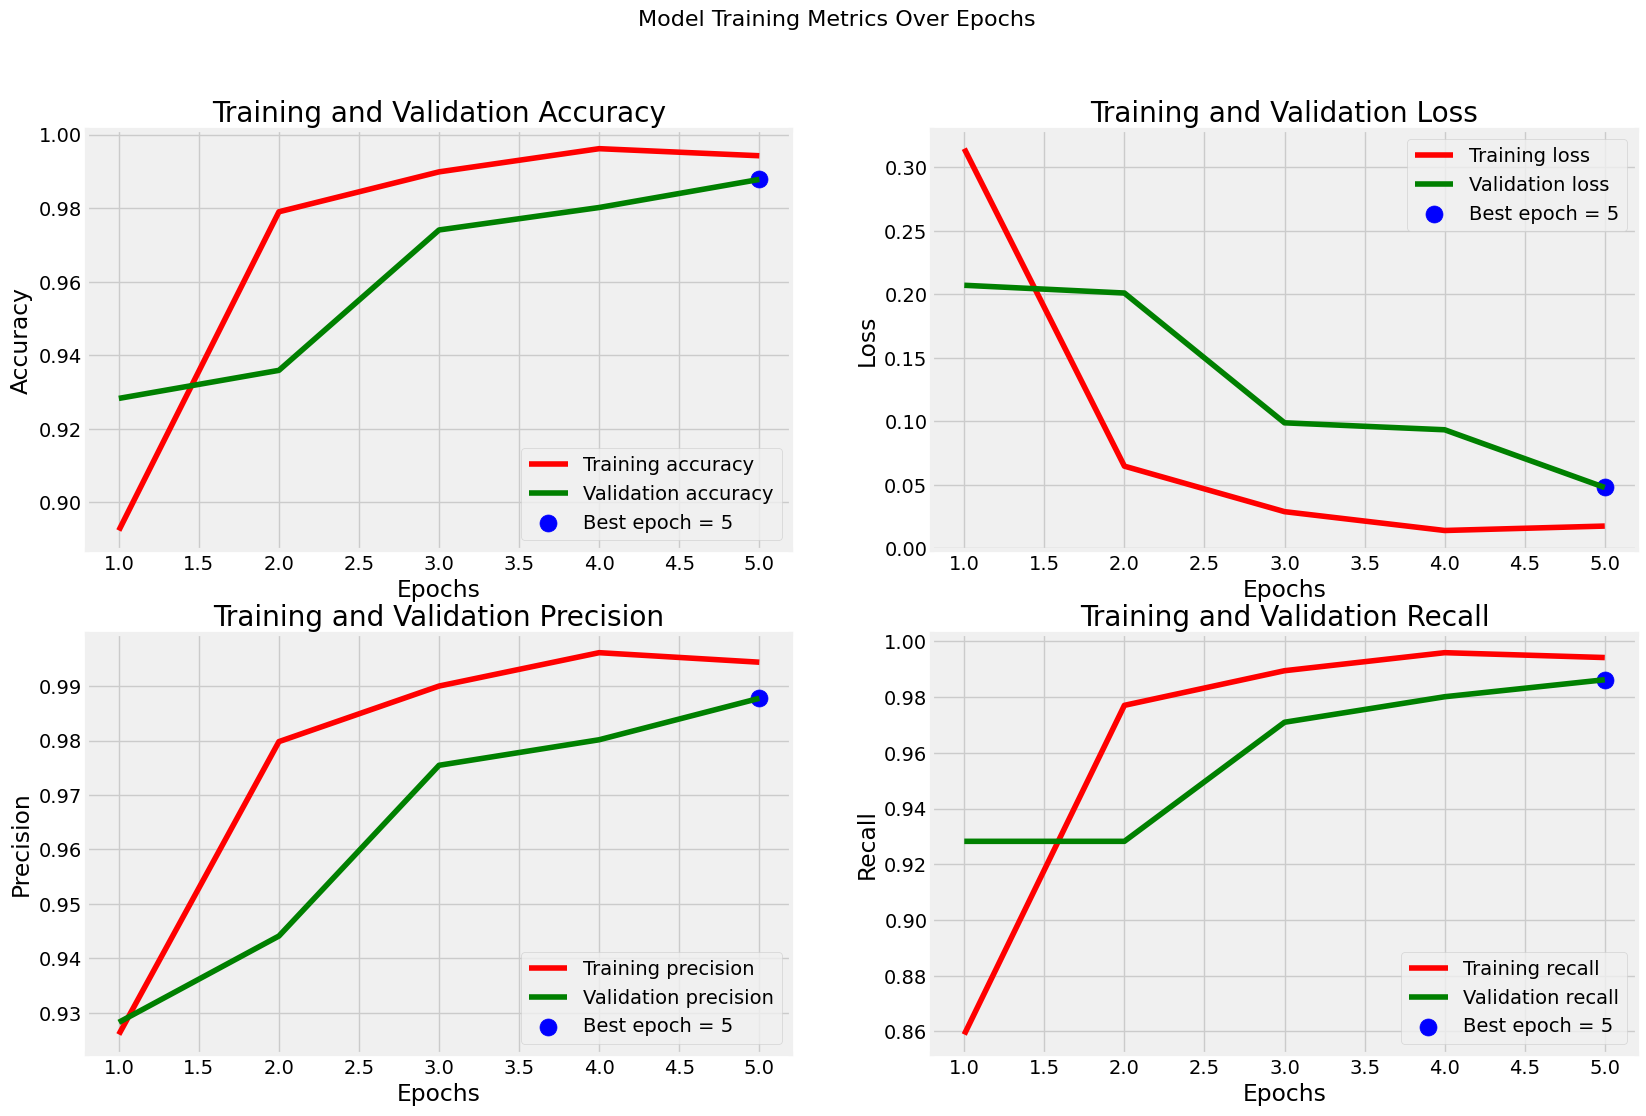

In [23]:
# Get training and validation metrics from history
metrics = ['accuracy', 'loss', 'precision', 'recall']
tr_metrics = {m: hist.history[m] for m in metrics}
val_metrics = {m: hist.history[f'val_{m}'] for m in metrics}

# Find best epochs and values
best_epochs = {}
best_values = {}
for m in metrics:
    if m == 'loss':
        idx = np.argmin(val_metrics[m])
    else:
        idx = np.argmax(val_metrics[m])
    best_epochs[m] = idx + 1
    best_values[m] = val_metrics[m][idx]

# Plot metrics
plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    epochs = range(1, len(tr_metrics[metric]) + 1)

    plt.plot(epochs, tr_metrics[metric], 'r', label=f'Training {metric}')
    plt.plot(epochs, val_metrics[metric], 'g', label=f'Validation {metric}')
    plt.scatter(best_epochs[metric], best_values[metric], s=150, c='blue',
                label=f'Best epoch = {best_epochs[metric]}')

    plt.title(f'Training and Validation {metric.title()}')
    plt.xlabel('Epochs')
    plt.ylabel(metric.title())
    plt.grid(True)
    plt.legend()

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()


In [24]:
train_score = model.evaluate(tr_gen, verbose=1)
valid_score = model.evaluate(valid_gen, verbose=1)
test_score = model.evaluate(ts_gen, verbose=1)

print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print(f"Train Loss: {train_score[0]:.4f}")

print(f"\nValidation Accuracy: {valid_score[1]*100:.2f}%")
print(f"Validation Loss: {valid_score[0]:.4f}")

print(f"\nTest Accuracy: {test_score[1]*100:.2f}%")
print(f"Test Loss: {test_score[0]:.4f}")


179/179 ━━━━━━━━━━━━━━━━━━━━ 44s 242ms/step - accuracy: 0.9968 - loss: 0.0075 - precision: 0.9968 - recall: 0.9968
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 211ms/step - accuracy: 0.9832 - loss: 0.0577 - precision: 0.9836 - recall: 0.9819
 1/41 ━━━━━━━━━━━━━━━━━━━━ 6s 165ms/step - accuracy: 1.0000 - loss: 4.7991e-04 - precision: 1.0000 - recall: 1.0000

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 137ms/step - accuracy: 0.9976 - loss: 0.0102 - precision: 0.9976 - recall: 0.9976
Train Accuracy: 99.79%
Train Loss: 0.0060

Validation Accuracy: 98.63%
Validation Loss: 0.0527

Test Accuracy: 99.70%
Test Loss: 0.0133


41/41 ━━━━━━━━━━━━━━━━━━━━ 9s 101ms/step


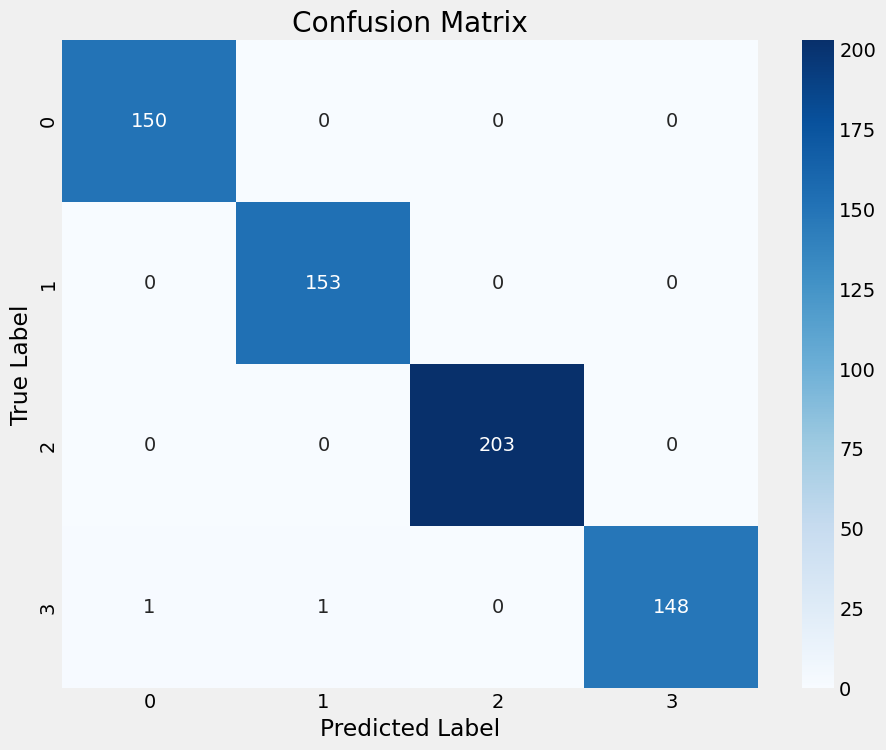

In [25]:
preds = model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

class_dict = {
    0: 'glioma',
    1: 'meningioma',
    2: 'no_tumor',
    3: 'pituitary'
}

# Then create and display the confusion matrix
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [26]:
from PIL import Image

def predict(img_path: str) -> None:
    # Get class labels
    labels = list(class_dict.keys())

    # Create figure
    plt.figure(figsize=(6, 8))

    # Load and preprocess image
    img = Image.open(img_path)
    resized_img = img.resize((299, 299))
    img_array = np.asarray(resized_img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    # Get model predictions
    predictions = model.predict(img_array)
    probabilities = list(predictions[0])

    # Get predicted class
    predicted_class_idx = np.argmax(probabilities)
    predicted_class = class_dict[predicted_class_idx]

    # Plot original image
    plt.subplot(2, 1, 1)
    plt.imshow(resized_img)
    plt.title(f"Input MRI Image\nPredicted: {predicted_class}")

    # Plot prediction probabilities
    plt.subplot(2, 1, 2)
    bars = plt.bar(labels, probabilities)
    plt.xlabel("Class")
    plt.ylabel("Probability")
    plt.title("Class Probabilities")

    # Add probability labels to bars
    ax = plt.gca()
    ax.bar_label(bars, fmt="%.2f")

    plt.tight_layout()
    plt.show()

    print(f"\nPredicted tumor type: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


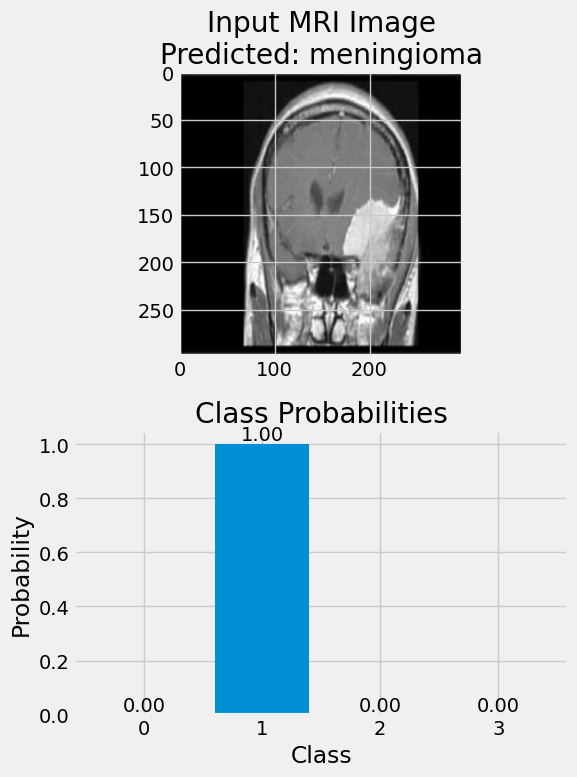


Predicted tumor type: meningioma


In [27]:
predict("/content/Testing/meningioma/Te-meTr_0000.jpg")

In [28]:
model.save_weights("xception_model.weights.h5")